<a href="https://colab.research.google.com/github/isabelntho/2022_ML_Earth_Env_Sci/blob/main/Lab_Notebooks/S3_2_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2: Training and Fine-Tuning a Decision Tree for the Moons Dataset

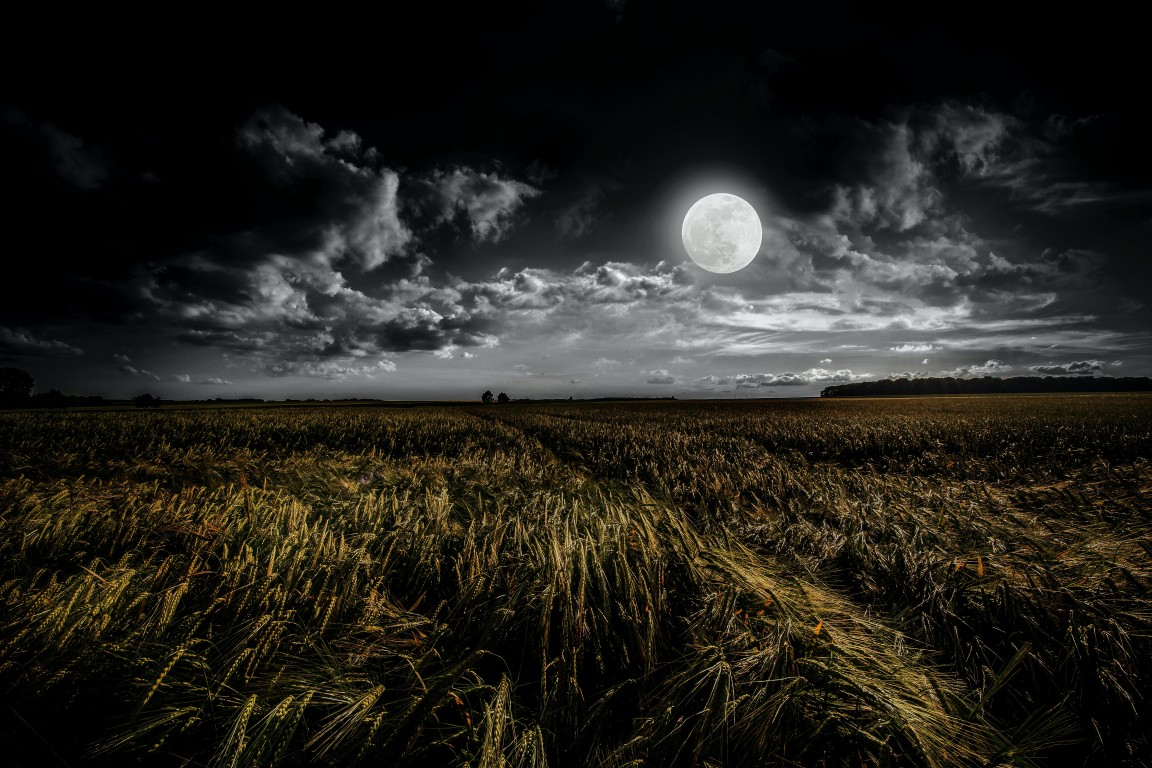

Can we grow a tree to predict the moon? 🌳 🌛

The goal of this exercise is to train and adjust the hyperparameters of a decision tree on a synthetic "moons" dataset. The dataset contains two interleaving half circles that we seek to separate via classification.

First, let's generate a moons dataset using [`make_moons`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html).

In [ ]:
from sklearn.datasets import make_moons # Import function to make moons

In [ ]:
# Make 10,000 samples with Gaussian noise that has a standard deviation of 0.4
X, y = make_moons(n_samples=10000, noise=0.4)

**Q1) Split the moons dataset into a training and a test set**

Hint 1: You may use the [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function of `scikit-learn`.

Hint 2: We recommend keeping 20% of the dataset for testing.

In [ ]:
# Split the dataset into a training set and a test set
import numpy as np

rnd_seed = 42
rnd_gen = np.random.default_rng(rnd_seed)

# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split

# set % of data to be used for testing
test_size=.20

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = test_size, 
                                                    random_state = rnd_seed)

**Q2) Visualize the data, indicating which points belong to each half circle of the moon, and which points belong to the training and test sets**

Hint 1: In the moons dataset, `X` contains the 2D spatial coordinates of each sample, while `y` indicates which half circle of the moon the sample belongs to.

Hint 2: You may randomly subsample your data for visualization purposes. Alternatively, you can adjust the size and transparency of a [Matplotlib scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) by varying the parameters `s` and `alpha`.

<a name="Q2"></a>

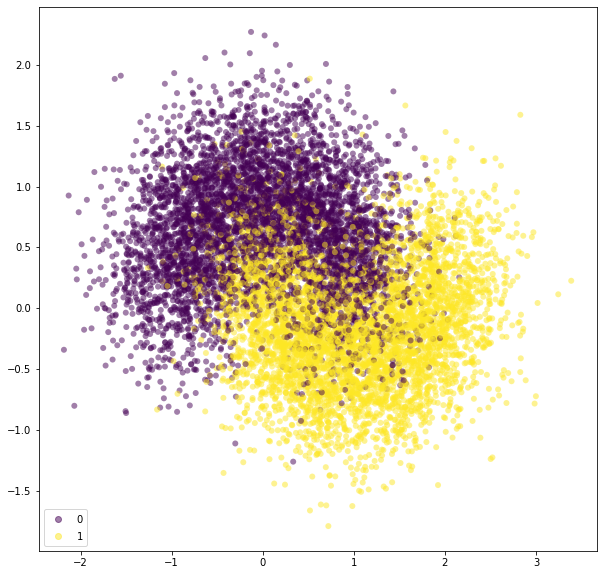

In [ ]:
# Scatter the moon data and don't forget to add a legend to your figure
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 10))
p = ax.scatter(X[:,0], X[:,1], c=y, label=y,
               alpha=0.5, edgecolors='none')
ax.legend(*p.legend_elements(), loc="lower left")

Do your data & training/test splits look reasonable?

**Q3) Conduct a hyperparameter search to find the two hyperparameters that lead to the best-performing decision tree**

Hint 1: You can conduct an exhaustive hyperparameter search over specified parameter values using the `GridSearchCV` class documented [at this link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). We recommend using cross-validation by setting the parameter `cv`.

Hint 2: If you choose to train a [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) object, we recommmend conducting the search over the `max_leaf_nodes` and `min_samples_split` hyperparameters. Consult the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) to decide which range to search over.

<a name="Q3"></a>

In [ ]:
# Import the necessary classes and functions
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Conduct the grid search to find good hyperparameter values 
# for your decision tree
dtree = DecisionTreeClassifier()

param_grid = {'max_leaf_nodes':[2, 3, 4, 5, 6, 7], 'min_samples_split':[2, 4, 6, 8, 10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40]}
param_grid

grid_search = GridSearchCV(dtree, param_grid, cv=6, verbose=3)

# Complete the code
grid_search.fit(X_train, y_train)

Fitting 6 folds for each of 120 candidates, totalling 720 fits
[CV 1/6] END max_leaf_nodes=2, min_samples_split=2;, score=0.765 total time=   0.0s
[CV 2/6] END max_leaf_nodes=2, min_samples_split=2;, score=0.776 total time=   0.0s
[CV 3/6] END max_leaf_nodes=2, min_samples_split=2;, score=0.780 total time=   0.0s
[CV 4/6] END max_leaf_nodes=2, min_samples_split=2;, score=0.780 total time=   0.0s
[CV 5/6] END max_leaf_nodes=2, min_samples_split=2;, score=0.787 total time=   0.0s
[CV 6/6] END max_leaf_nodes=2, min_samples_split=2;, score=0.775 total time=   0.0s
[CV 1/6] END max_leaf_nodes=2, min_samples_split=4;, score=0.765 total time=   0.0s
[CV 2/6] END max_leaf_nodes=2, min_samples_split=4;, score=0.776 total time=   0.0s
[CV 3/6] END max_leaf_nodes=2, min_samples_split=4;, score=0.780 total time=   0.0s
[CV 4/6] END max_leaf_nodes=2, min_samples_split=4;, score=0.780 total time=   0.0s
[CV 5/6] END max_leaf_nodes=2, min_samples_split=4;, score=0.787 total time=   0.0s
[CV 6/6] END 

GridSearchCV(cv=6, estimator=DecisionTreeClassifier(),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18,
                                               20, 22, 24, 26, 28, 30, 32, 34,
                                               36, 38, 40]},
             verbose=3)

In [ ]:
# Print the best values you found for the hyperparameters
# using the `best_estimator_` attribute of your grid search object
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_params_['max_leaf_nodes'])

{'max_leaf_nodes': 4, 'min_samples_split': 2}
0.8587501073169341
4


**Q4) Using the best hyperparameter values you found, train a decision tree over the entire training set and calculate its accuracy over both the training and test sets**

Hint 1: [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) has a method `predict` that automatically selects the best model found during the search.

Hint 2: Using the [accuracy classification score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), you should find an accuracy of $\approx$85% on the test set.

In [ ]:
# Make predictions on the training and test sets with your best model
y_pred = grid_search.predict(X_test)

2000

In [ ]:
# Calculate the accuracy of the best model over the training and test sets
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print(f'The accuracy of the model is {accuracy:.1%}')

The accuracy of the model is 84.8%


**Q5) Visualize the errors made by your best model**

Hint: You may recycle the visualization scripts you developed in [Question 2](#Q2)

[array([ True,  True,  True, ...,  True,  True,  True])]


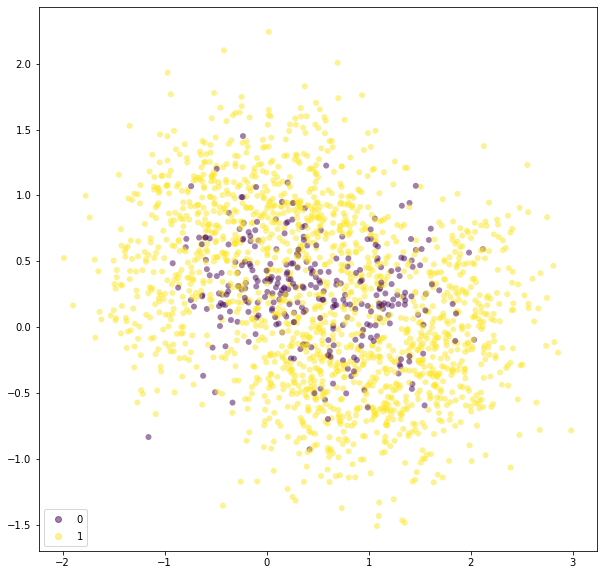

In [ ]:
# Scatter points for which your best model made erroneous predictions
# and compare them to points for which your best models made correct predictions
y_acc = [y_pred==y_test]
print(y_acc)
#longer method
#y_acc= np.empty(len(y_pred))
#for i in range(len(y_pred)):
 # if y_pred[i] == y_test[i]:
  #  y_acc[i]=1
  #else:
   # y_acc[i]=0


fig, ax = plt.subplots(figsize=(10, 10))
p = ax.scatter(X_test[:,0], X_test[:,1], c=y_acc,
               alpha=0.5, edgecolors='none')
ax.legend(*p.legend_elements(), loc="lower left")

Can you think of ways to improve your best model?

# Bonus Exercise 2: Upgrading the Decision Tree to a Random Forest

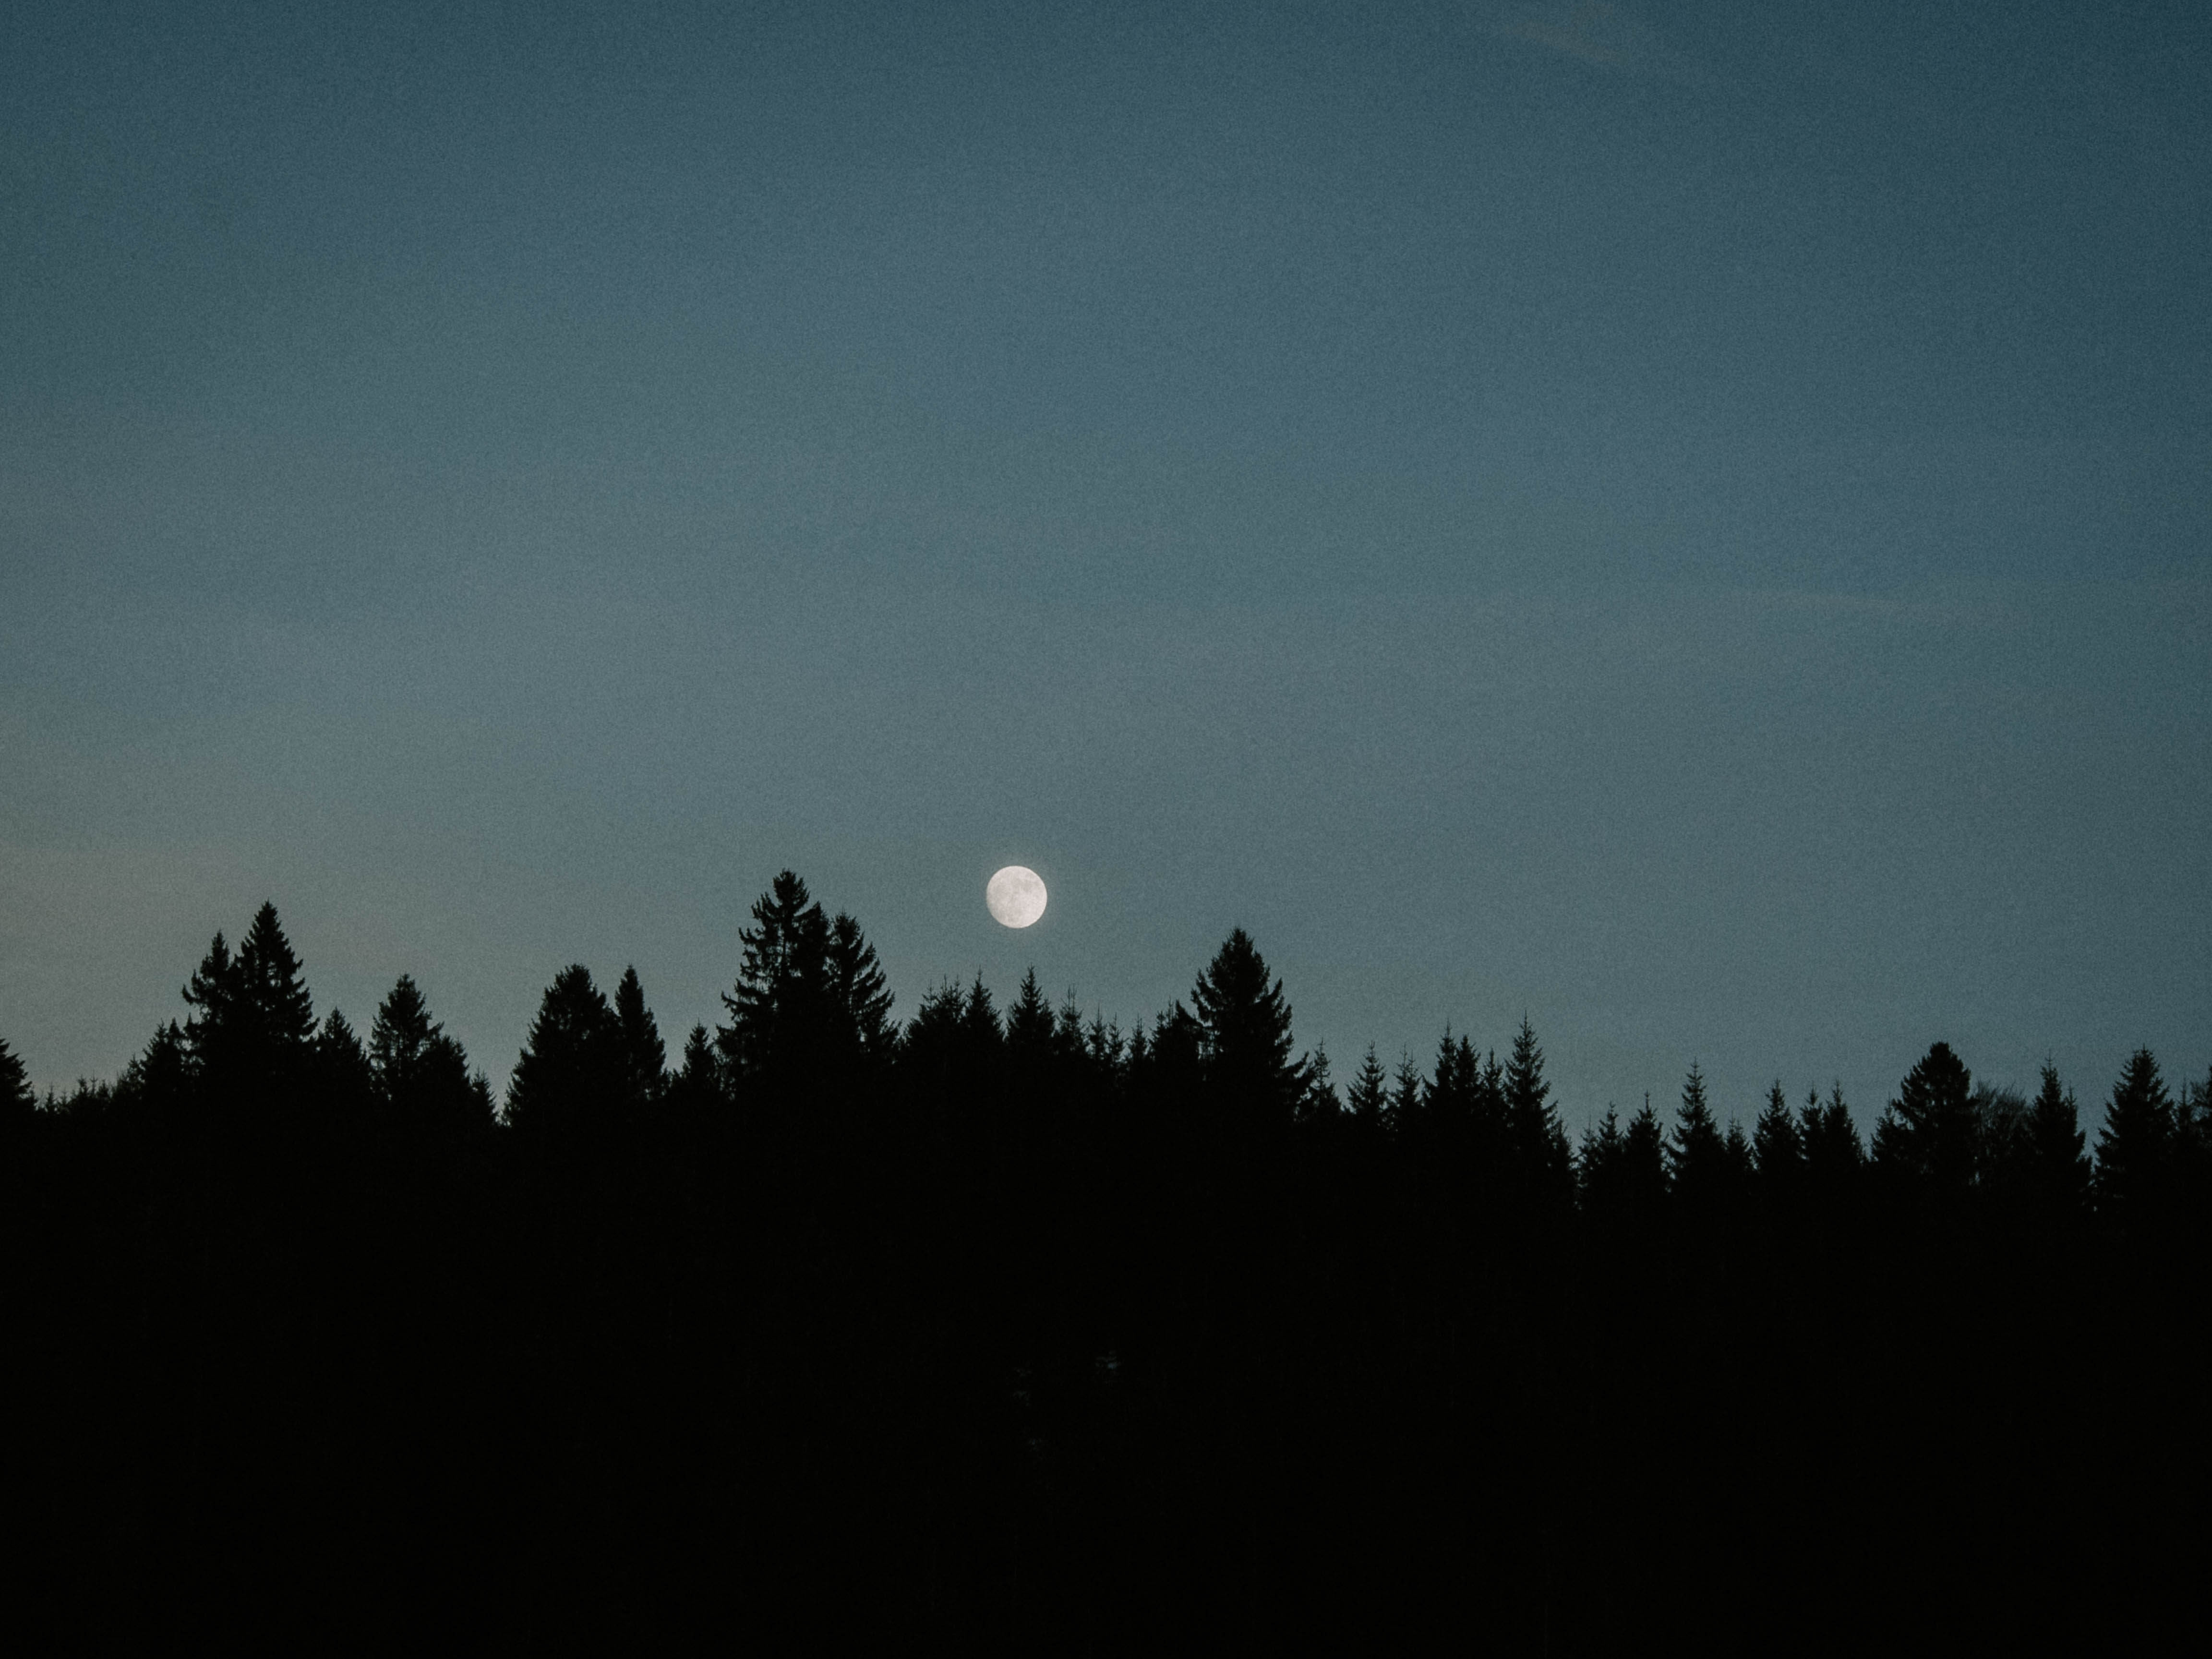

Is a full forest enough to predict the moon? 🌲

Building on the previous exercise, we would like to upgrade the decision tree to a random forest to make more accurate predictions on the `moons` dataset.

**Q1) Generate 1,000 subsets of the training set, each containing 100 instances selected randomly**

Hint: You may use `scikit-learn`'s random permutation cross-validator [ShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html) with the appropriate value of the  `n_splits` parameter.

In [ ]:
# Import and build the random permutation cross-validator
from sklearn.model_selection import ShuffleSplit
rs = ShuffleSplit(n_splits=1000, train_size=100, test_size=20, random_state=100)
rs

ShuffleSplit(n_splits=1000, random_state=100, test_size=20, train_size=100)

In [ ]:
# Generate 1,000 subsets of the training sets with 
# 100 randomly-selected instances
rs.get_n_splits(X)
print_lim = 0
for train_index, test_index in rs.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

Streaming output truncated to the last 5000 lines.
 7639 9144  330 2041 2247 7241 7274 5907 9239 4295 3624 3887 7984 9028
 3873 9702 1069 1500 6300 9732 6212 6677 9969 7647 8220 4265 1959 5916
 1029 6078 7140 5396 5201 8691 6902 4131 7951 5423  785  201 6687 8339
  819 9670] TEST: [4070 7378 9824 9185 8546 9657 5964 6469  994 8780 3909 6630 1038 5412
 8141 3465 4493 9817 9616 6899]
TRAIN: [3962 6615 7486  603 2811 1921 8375  787  439 3788 6953 2128 1122  131
 2056  426 9164 2881  879 6999 7781 6820 5325 7333 6573 8518 3772 2719
 8441 5284 1941 2684 9675 2576 5067 4421 1105 5802 3505 2983 2799 9920
 8453 7037 6848 4242 8164 2383 2986 8568  897 3827 1996 2249 6336 7558
 4585 4201  826 5940 9991 7423 8732 7271 4778 2154   10 1778 2402 2614
 1821  555 3104 9261 4780 3557  716  793 8754 9359 5570 7299 8724 4577
 5887 5743 7452 7937 5614 7179 4618 8290 1757 5048 5123 2778 8180 2291
 5295 5287] TEST: [6363 6496 3923 2918 1216 1877 9028 5692 1489 3905 1775 4378 1793 1225
 1002 5436  235 1840 9

**Q2) Train one [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on each subset, using the best hyperparameter values found [above](#Q3)**

In [ ]:
# Train one decision tree per subset

**Q3) Evaluate each decision tree on the test set and visualize their accuracy**

Hint 1: You can quickly make histograms by using `Matplotlib.pyplot`'s [`hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) function

Hint 2: The mean accuracy of your decision trees should be approximately 80% because the decision trees are fitted on smaller sets. 

In [ ]:
# Train one decision tree on each subset
pred_array = np.empty([0, 20]) 
test_array = np.empty([0, 20])
print(pred_array.shape)
#
for train_index, test_index in rs.split(X):
    dtree = DecisionTreeClassifier(max_leaf_nodes = grid_search.best_params_['max_leaf_nodes'],
            min_samples_split = grid_search.best_params_['min_samples_split'])
    dtree.fit(X[train_index], y[train_index])
    test_vals = X[test_index]
    test_array = np.concatenate([test_array, y_pred], axis=0)
    y_pred = dtree.predict(X[test_index])
    y_pred = y_pred[None, :]
    pred_array = np.concatenate([pred_array, y_pred], axis=0)
print(pred_array.shape)
print(pred_array[:3,])
print(test_array[:3,])

(0, 20)
(1000, 20)
[[1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1.]
 [1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1.]
 [1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0.]]
[[0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1.]
 [1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1.]
 [1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1.]]


In [ ]:
# Calculate the mean accuracy
acc_list = np.empty([0]) 
#testme = 0
for i in range(test_array.shape[0]):
  #while testme !=1:
    acc = accuracy_score(test_array[i], pred_array[i])
    acc_list = np.append(acc_list, acc)
    #testme += 1
print(np.mean(acc_list))

0.5042


(array([  1.,   2.,  42.,  54., 308., 183., 286.,  66.,  49.,   9.]),
 array([0.1  , 0.175, 0.25 , 0.325, 0.4  , 0.475, 0.55 , 0.625, 0.7  ,
        0.775, 0.85 ]),
 <a list of 10 Patch objects>)

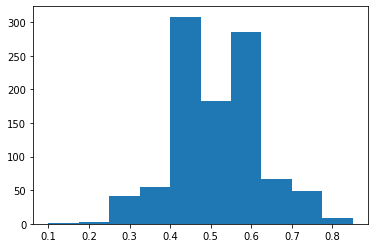

In [ ]:
# Visualize the distribution of accuracies
plt.hist(acc_list)

Now comes the magic ❇ 🌲 ❇ 

**Q4) Generate the predictions of the 1,000 decision trees over the test set, and only keep the most frequent prediction. This gives you *majority-vote predictions* over the test set**

Hint: You may use `Scipy`'s [`mode`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html) function to calculate the most frequent prediction.

In [ ]:
# Generate the predictions of all trained decision trees over the test set

In [ ]:
# For each instance of the test set, calculate the majority-vote prediction

Congratulations!! 😃 You have created a random forest classifier 🌲 🌳 🌲

**Q5) Calculate the accuracy of your random forest classifier and visualize its performance**

Hint: Your accuracy should be approximately 1% higher than your best decision tree. 

In [ ]:
# Calculate the accuracy of your random forest classifier

In [ ]:
# Visualize its errors: Which points did the
# random forest classify correctly 
# when the decision tree was making an error?